## Árboles de decisión

Los árboles de decisión en machine learning son modelos predictivos que dividen datos en ramas mediante reglas de if-else. Cada nodo representa una característica, cada rama una decisión y cada hoja un resultado. Son intuitivos, manejan datos numéricos y categóricos, pero pueden sobreajustarse

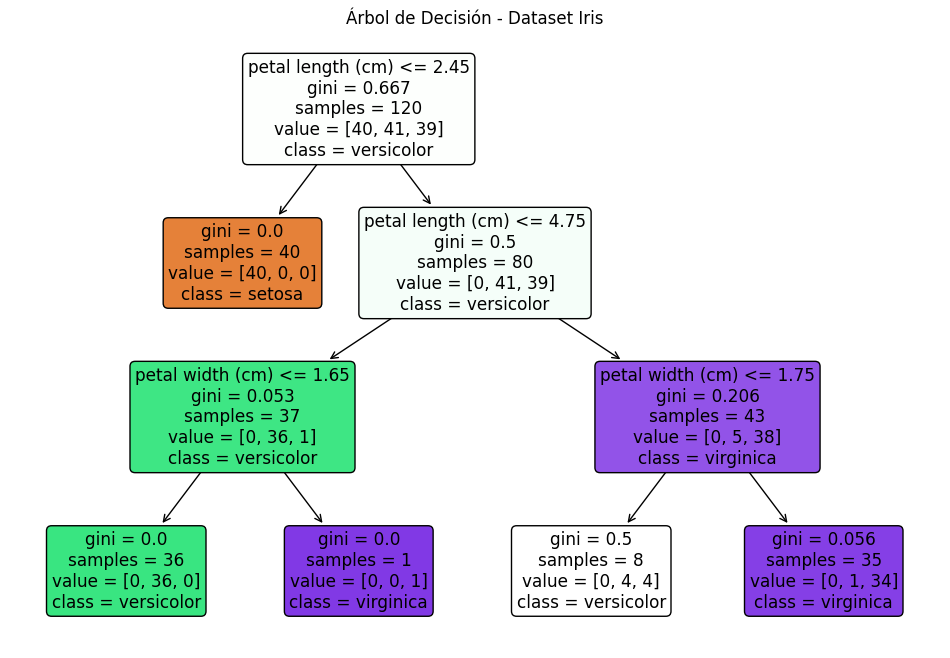

Precisión: 1.00


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#  dataset Iris 
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target (clases: 0, 1, 2)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

# Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(modelo, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True)
plt.title("Árbol de Decisión - Dataset Iris")
plt.show()

# Evaluar precisión
print(f"Precisión: {modelo.score(X_test, y_test):.2f}")

### Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
from sklearn.metrics import accuracy_score

# Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f"Precisión Árbol: {accuracy_score(y_test, y_pred_dt):.2f}")

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Precisión Random Forest: {accuracy_score(y_test, y_pred_rf):.2f}")

Precisión Árbol: 1.00
Precisión Random Forest: 1.00


En este ejemplo, usamos el dataset de diabetes (disponible públicamente) para entrenar un modelo de Random Forest que predice si un paciente tiene diabetes (Outcome = 1) o no (Outcome = 0).

Precisión Random Forest: 0.75
Precisión Árbol de Decisión: 0.70


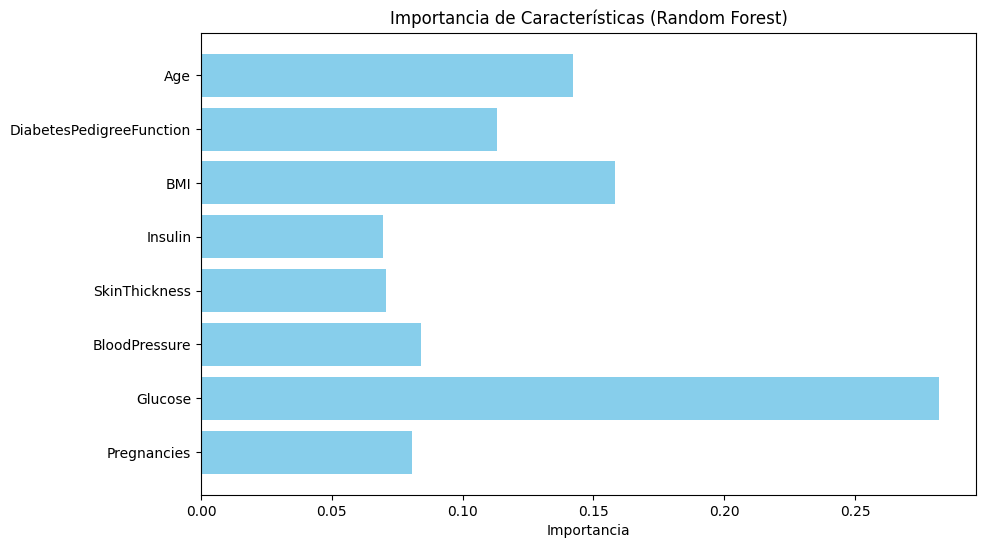

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
datos = pd.read_csv(url)
X = datos.drop('Outcome', axis=1) 
y = datos['Outcome'] 

# 2. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 4. Entrenar Árbol de Decisión (para comparación)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 5. Precisión de ambos modelos
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)
print(f"Precisión Random Forest: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precisión Árbol de Decisión: {accuracy_score(y_test, y_pred_dt):.2f}")

# 6. Visualizar importancia de características (Random Forest)
importancias = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importancias, color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de Características (Random Forest)')
plt.show()

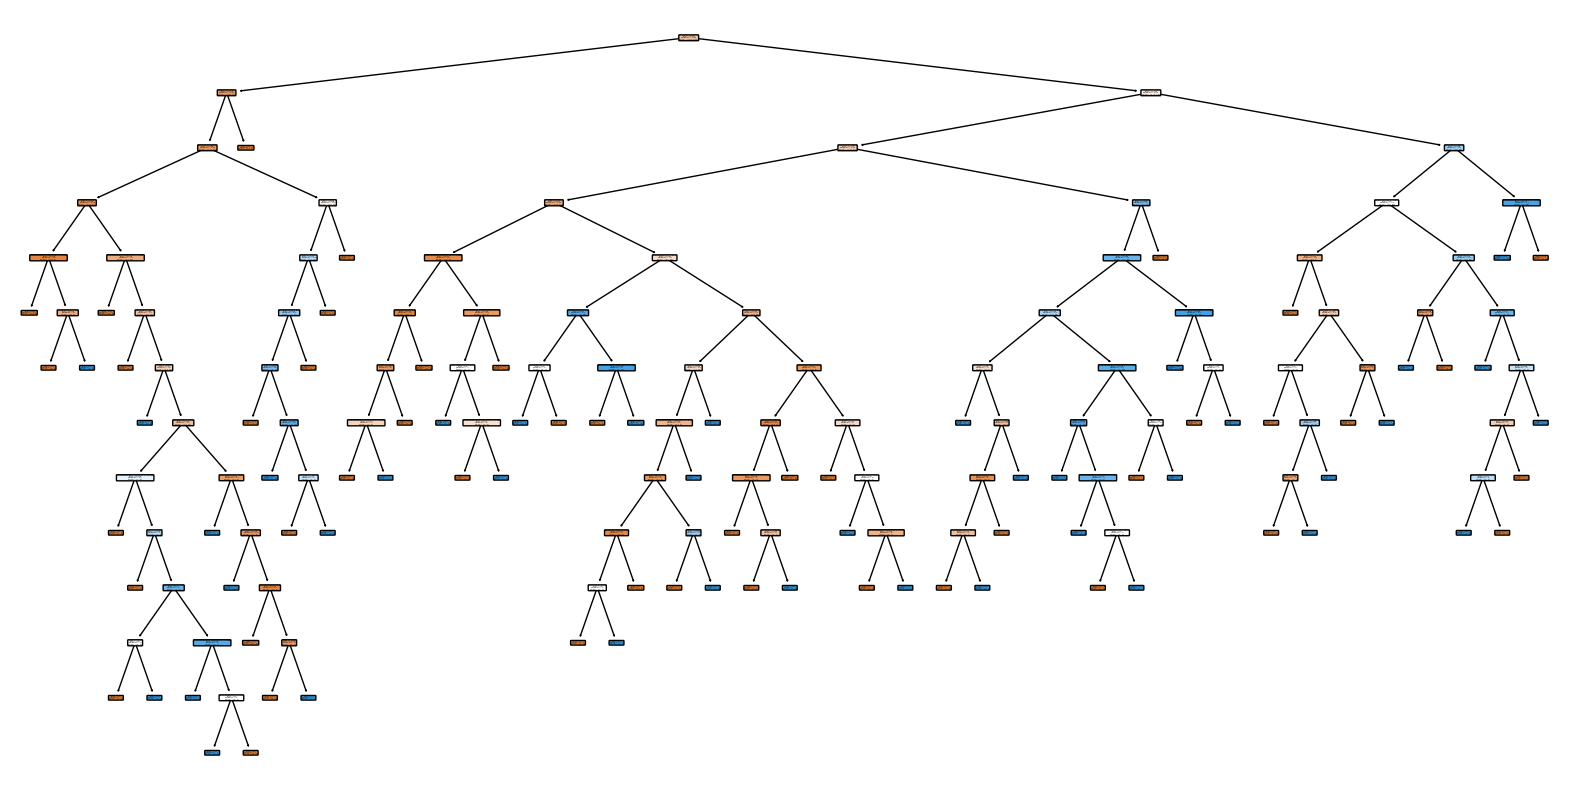

In [7]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=features, filled=True, rounded=True)  # Primer árbol
plt.show()

Gráfico de barras horizontales: Muestra qué variables influyen más en la predicción.

<BarContainer object of 8 artists>

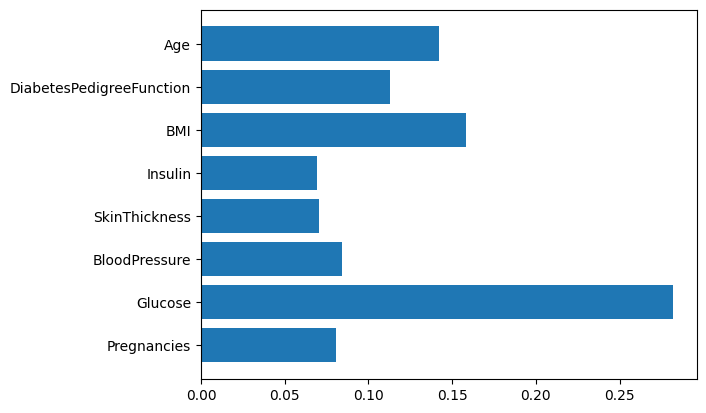

In [8]:
importancias = rf.feature_importances_
features = X.columns
plt.barh(features, importancias)

Glucose: La más importante (nivel de azúcar en sangre es clave para diabetes).

BMI: Segundo lugar (obesidad es un factor de riesgo).

Age: Tercero (la diabetes tipo 2 es más común en adultos).